In [1]:
import finpy_tse as fpy
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Set up global plot formatting using rcParams
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size
plt.rcParams['lines.linewidth'] = 2       # Set default line width
plt.rcParams['axes.grid'] = 0         # Show grid by default
plt.rcParams['axes.labelsize'] = 14      # Set default label size
plt.rcParams['xtick.labelsize'] = 12     # Set default x-axis tick label size
plt.rcParams['ytick.labelsize'] = 12     # Set default y-axis tick label size
plt.rcParams['legend.fontsize'] = 12     # Set default legend font size


NameError: name 'd' is not defined

In [2]:
def getdata(name,start,end):
    d=pd.DataFrame(
        fpy.Get_Price_History(
        stock=name,
        start_date=start,
        end_date=end,
        ignore_date=False,
        adjust_price=True,
        show_weekday=False,
        double_date=True),
    )
    return d['Close']


<AxesSubplot: xlabel='J-Date'>

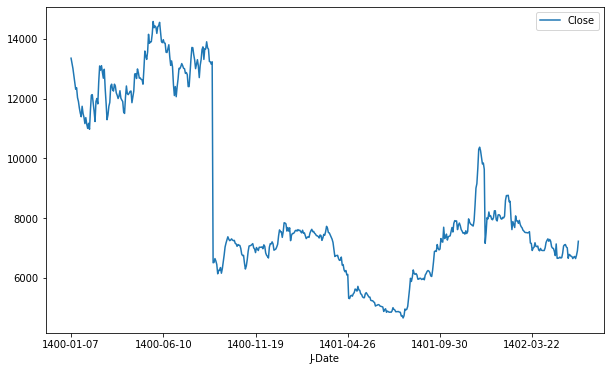

In [3]:
pd.DataFrame(getdata('فملی', '1400-01-01' , '1402-06-05')).plot(figsize=(10,6))


In [4]:
def timeseries(*arg):
    df = pd.DataFrame()
    def modify_attribute():
        getdata.adjust_price = True
        getdata.double_date=True
        return getdata
    for i in arg:
        newdata=getdata(i, '1402-01-01' , '1402-06-05')
        newcolumnname = f'{i}'
        df[newcolumnname] = newdata
    return df,df.plot(figsize=(10,6))

(            خودرو   فولاد  فملی   وپارس   وبملت
 J-Date                                         
 1402-01-05   3443  6300.0  8010  2060.0  3355.0
 1402-01-06   3319  6180.0  7970  2000.0  3255.0
 1402-01-07   3410  6400.0  8200  2084.0  3362.0
 1402-01-08   3430  6320.0  8050  2136.0  3399.0
 1402-01-09   3582  6320.0  8070  2150.0  3410.0
 ...           ...     ...   ...     ...     ...
 1402-05-30   2513  5070.0  6710  1713.0  4440.0
 1402-05-31   2415  4990.0  6640  1696.0  4344.0
 1402-06-01   2545  5040.0  6750  1771.0  4469.0
 1402-06-04   2598  5260.0  6900  1815.0  4542.0
 1402-06-05   2725  5520.0  7220  1845.0  4671.0
 
 [95 rows x 5 columns],
 <AxesSubplot: xlabel='J-Date'>)

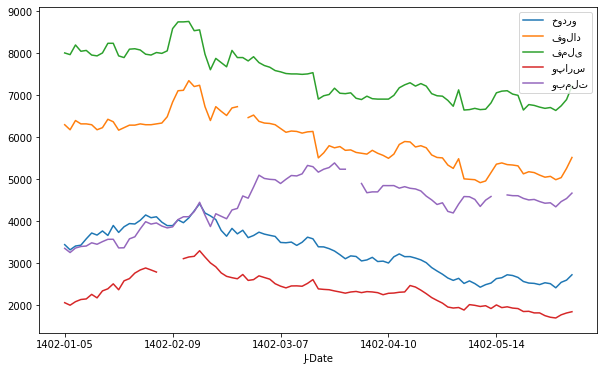

In [5]:
timeseries('خودرو','فولاد','فملی','وپارس','وبملت')


In [ ]:
r_timeseries('خودرو','فولاد','فملی','وپارس','وبملت','شستا',n=30)

In [ ]:
dollarr=fpy.Get_USD_RIAL(
    start_date='1400-06-05',
    end_date='1402-06-05',
    ignore_date=False,
    show_weekday=False,
    double_date=False)
pd.DataFrame(dollarr)['Close'].pct_change(periods=30).plot(figsize=(10,6))

In [95]:
def r_timeseries(*arg,n):
    dr = pd.DataFrame()
    def modify_attribute():
        getdata.adjust_price = True
        getdata.double_date=True
        return getdata
    for i in arg:
        newdata=getdata(i, '1398-06-05' , '1402-06-05')
        newcolumnname = f'{i}'
        dr[newcolumnname] = newdata.pct_change(periods=n,fill_method ='bfill')
    colors=['red', 'blue', 'brown','pink','orange','black']
    plot=dr.plot(figsize=(10,6),color=colors,xticks=range(1,len(dr),65))
    #plot.set_ylim([0.015,0.04])
    return plot

<AxesSubplot: xlabel='J-Date'>

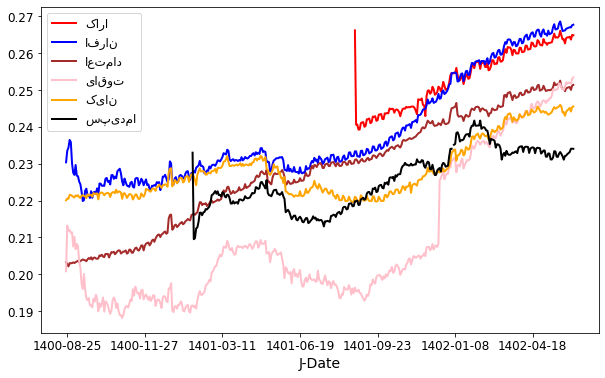

In [96]:
r_timeseries('کارا','افران','اعتماد','یاقوت','کیان','سپیدما',n=242)